In [1]:
import cv2 
import glob
import tensorflow as tf
from mtcnn import MTCNN
import warnings
import os
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings(action="ignore")

In [2]:
path_dir ="D:/Image/TestImg/" # 이미지파일 폴더 경로
file_list = os.listdir(path_dir) # 폴더안에 있는 파일 모두 불러오기
input_list = [file for file in file_list if file.endswith(".jpg")]
input_list

['orgImg_1.jpg', 'orgImg_2.jpg']

# MTCNN으로 각 이미지 랜드마크 추출

In [3]:
#폴더안의 이미지 모두 검사 *******
result = {} # 딕셔너리

for imgName in input_list:
     img = cv2.cvtColor(cv2.imread(path_dir + imgName), cv2.COLOR_BGR2RGB) # 칼라배열 변환
     detector = MTCNN()
     result[imgName] = detector.detect_faces(img) # 검출 실행 및 검출 위치값 저장

In [4]:
result.keys()

dict_keys(['orgImg_1.jpg', 'orgImg_2.jpg'])

In [5]:
list(result.keys())[0]

'orgImg_1.jpg'

In [6]:
imageName = list(result.keys())[0]
result[imageName]

[{'box': [137, 19, 66, 89],
  'confidence': 0.9998076558113098,
  'keypoints': {'left_eye': (154, 53),
   'right_eye': (186, 58),
   'nose': (168, 74),
   'mouth_left': (153, 85),
   'mouth_right': (180, 89)}}]

In [7]:
result[imageName][0]['box'][3] # [0]은 이미지안에 검출된 얼굴들중 0번째 얼굴만을 가리킨다 

89

In [8]:
result[imageName][0]['keypoints']['left_eye']

(154, 53)

# 검출된 부분 표시

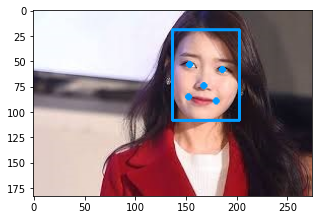

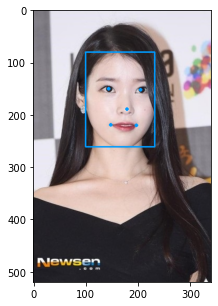

In [9]:
for key in result.keys():   # 딕셔너리의 key값을 모두 가져온다 
    image = path_dir + key
    image = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB) 
        
    for i in range(0, len(result[key])):
        person = result[key][i] 
        bounding_box = person["box"]
        keypoints = person['keypoints']

       

        cv2.rectangle(image,
                      (bounding_box[0], bounding_box[1]),
                      (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
                      (0,155,255), 2)

        cv2.circle(image,(keypoints['left_eye']), 2, (0,155,255), 2)
        cv2.circle(image,(keypoints['right_eye']), 2, (0,155,255), 2)
        cv2.circle(image,(keypoints['nose']), 2, (0,155,255), 2)
        cv2.circle(image,(keypoints['mouth_left']), 2, (0,155,255), 2)
        cv2.circle(image,(keypoints['mouth_right']), 2, (0,155,255), 2)
        
    # 이미지 저장
    key.split('.')[0] # 파일이름,   구분자로 문자자르기
    rImg = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # 칼라배열 변환
    cv2.imwrite(path_dir + key + '_Result.jpg', rImg) # opencv로 저장    
    
    # 검사모습보기
    fig = plt.figure(figsize=(5,5))
    plt.imshow(image)         
    plt.grid(False)
    plt.show()
    
    # # matplotlib를 통한 이미지 저장
    # fig = plt.figure()
    # fig.savefig(path_dir + imageName + '_Result.jpg')

# txt파일로 각 이미지의 검출위치값 저장

In [10]:
if len(result) > 0:  # result에 값이 들어 있다면
    for key in result.keys():  # 딕셔너리의 key값을 모두 가져온다
        txt = key.replace(".jpg", ".txt")
        f = open(txt, 'w')
        s = ''
        for point in result[key][0]['keypoints']:
            s = str(result[key][0]["keypoints"][point]).replace('(', '').replace(')', '\n').replace(',', '')
            f.write(s)
        f.close()